In [25]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [26]:
import os
myCmd1_ = 'g++ __main__.cpp -o a'
myCmd1 = 'g++ __main__.cpp annexes.cpp grille.cpp joueur.cpp -o a'
myCmd2 = './a'

In [106]:
def sci(x):
    if (np.ceil(np.log10(x)) == 1):
        return round(x,2)
    elif (np.ceil(np.log10(x)) == 2):
        return round(x,1)
    else:
        return ("{:0.2e}".format(x))

def sci_s(x):
    if (np.ceil(np.log10(x)) == 1):
        return str(round(x,2))
    elif (np.ceil(np.log10(x)) == 2):
        return str(round(x,1))
    else:
        return str("{:0.2e}".format(x))

In [174]:
def afficheHisto_1data():   #Prend en argument 1 liste de scores
    data = np.loadtxt("resultats.dat", delimiter = ' ')
    N = np.shape(data[:,0])[0]
    gagnant = data[:,2]
    labels, counts = np.unique(gagnant, return_counts=True)
    plt.bar(labels, counts, align='center', color = "orange")
    #plt.hist(gagnant, color="orange", bins=3)
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de noir : ", counts)
    print("Pourcentage d'égalité, de victoires de blanc, de victoires de noir : ", counts/N*100)
    dx = 0.3
    plt.text(0-dx,1/2*counts[0], str(counts[0]) + ' (' + str(counts[0]/N*100) + '%)')
    plt.text(1-dx,1/2*counts[1], str(counts[1]) + ' (' + str(counts[1]/N*100) + '%)')
    plt.text(2-dx,1/2*counts[2], str(counts[2]) + ' (' + str(counts[2]/N*100) + '%)')
    plt.axhline(y = (N-counts[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed") 

In [127]:
def afficheHisto_moy(moy, std, N):   #Prend en argument une moyenne de scores
    plt.bar([0, 1, 2], moy, align='center', color = "orange")
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
    
    for i in range(3):
        plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
        plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
    plt.axhline(y = (N-moy[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed")

def stats(N):    #fait une moyenne sur N listes du nb de victoires B/N
    print("Nombre de set de parties sur lequel on moyenne: ", N)
    nbVict = np.zeros((N,3))   # tableau du nb de vict pour chaque set de data 
    for i in range(N):         # (0 = egalité, 1 = blanc, 2 = noir)
        os.system(myCmd1)
        os.system(myCmd2)
        data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
        gagnant = data[:,2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
        
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), N)
    #print(np.std(nbEgalite), np.std(nbVictB), np.std(nbVictN))

In [160]:
from scipy.optimize import curve_fit

def model(x, a, sigma, mu):
    return a * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(- (x-mu)*(x-mu)/(2*sigma*sigma))

def gaussienne():      #affiche la distrib gaussienne du score de blanc 
    data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
    N = np.shape(data[:,0])[0]
    scoreBlanc = data[:,1]
    labels, counts = np.unique(scoreBlanc, return_counts=True)
    print(labels, counts)
    xdata = labels
    ydata = counts
    popt, pcov = curve_fit(model, xdata, ydata, p0 = (1,1,30))  #popt renvoie les paramètres optimisés
    x = np.linspace(np.min(labels),np.max(labels),1000)
    plt.scatter(xdata,ydata, s=1)
    plt.plot(x, model(x, *popt), c="orange")
    plt.xlabel("Score de blanc")
    plt.ylabel("Nombre de parties")
    ytext = np.max(ydata) - N/200
    plt.text(5, ytext, r"y = $a\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$")
    plt.text(38, ytext, r"(a,$\sigma,\mu$) = (" + sci_s(popt[0]) + ', ' + sci_s(popt[1]) + ', ' + sci_s(popt[2]) + ')', size=8)
    

Comparaison des algorithmes

1) Aléatoire VS Aléatoire

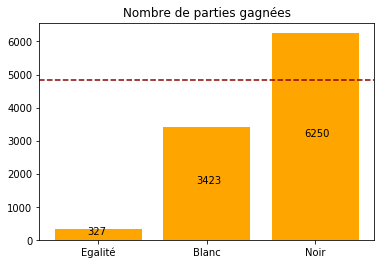

In [143]:
#Histogramme nb Parties gagnées

#os.system(myCmd1)
#os.system(myCmd2)

afficheHisto_1data()
#plt.savefig("Graphs/Histo_aleatoire.svg", format = 'svg')

[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59. 60. 61. 62. 63.] [  1   1   3   2   3  13  16  18  40 189  43 104  66 251 122 292 142 327
 176 331 228 345 250 361 285 349 319 325 337 377 335 370 329 307 311 314
 324 289 285 244 241 205 187 159 150 119  98  89  59  48  45  46  38  24
  23  15  12   5   7   6]


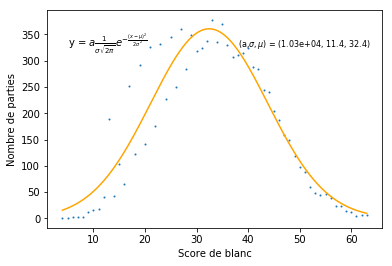

In [161]:
#os.system(myCmd1)
#os.system(myCmd2)

gaussienne()
#plt.savefig("Graphs/Gaussienne_aleatoire.svg", format = 'svg')

2) RetourneMax VS Aléatoire

2.1) Histogramme blanc VS noir

Nombre d'égalité, de victoires de blanc, de victoires de noir :  [ 349 6024 3627]
Pourcentage d'égalité, de victoires de blanc, de victoires de noir :  [ 3.49 60.24 36.27]


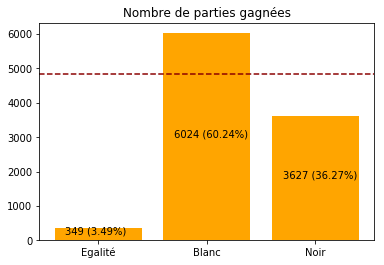

In [178]:
#os.system(myCmd1)
#os.system(myCmd2)

afficheHisto_1data()
#plt.savefig("Graphs/Histo_retourneMax_blanc.svg", format = 'svg')

2.2) Histogramme noir VS blanc

Nombre d'égalité, de victoires de blanc, de victoires de noir :  [ 327 3423 6250]
Pourcentage d'égalité, de victoires de blanc, de victoires de noir :  [ 3.27 34.23 62.5 ]


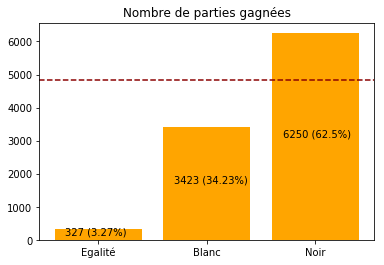

In [176]:
afficheHisto_1data()
#plt.savefig("Graphs/Histo_retourneMax_noir.svg", format = 'svg')

2.3) Gaussienne

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 61. 63.] [327  43  29  24  17  21  26  30  36  43  51  65 100 120 140 181 199 214
 244 231 270 286 324 298 322 323 306 361 325 346 363 360 351 302 310 317
 273 258 256 228 238 179 170 174 163 123 127 105  91  69  63  49  26  33
  16  14  17  12   7   1   2   1]


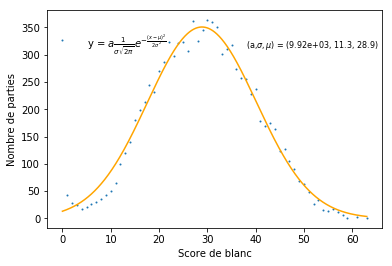

In [180]:
gaussienne()
#plt.savefig("Graphs/Gaussienne_retourneMax_blanc.svg", format = 'svg')

2.1) Aléatoire